In [38]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [7]:
df['Datetime']

0         2002-12-31 01:00:00
1         2002-12-31 02:00:00
2         2002-12-31 03:00:00
3         2002-12-31 04:00:00
4         2002-12-31 05:00:00
                 ...         
145361    2018-01-01 20:00:00
145362    2018-01-01 21:00:00
145363    2018-01-01 22:00:00
145364    2018-01-01 23:00:00
145365    2018-01-02 00:00:00
Name: Datetime, Length: 145366, dtype: object

In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<AxesSubplot:title={'center':'PJME Energy Usage Over Time (MW)'}, xlabel='Datetime'>

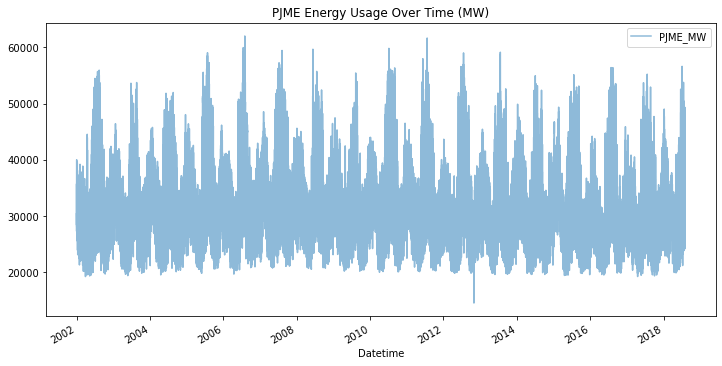

In [15]:
df.plot(kind='line', 
        alpha = 0.5, 
        figsize=(12,6),
        title = 'PJME Energy Usage Over Time (MW)')

# Train / Test Split

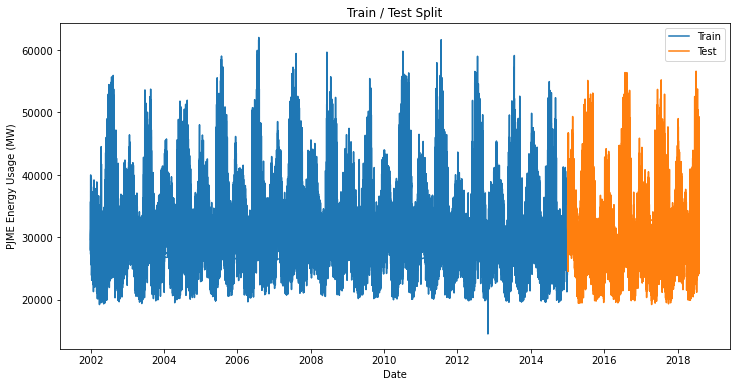

In [23]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index > '01-01-2015']

plt.figure(figsize = (12,6))
plt.plot(train.index.values, train['PJME_MW'].values, label = 'Train')
plt.plot(test.index.values, test['PJME_MW'].values, label = 'Test')
plt.legend()
plt.title('Train / Test Split')
plt.xlabel('Date')
plt.ylabel('PJME Energy Usage (MW)')
plt.show()

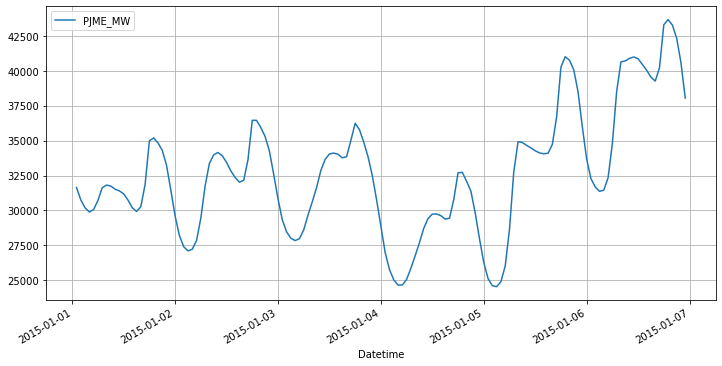

In [26]:
df.loc[(df.index > '01-01-2015') & (df.index < '01-07-2015')].plot(kind='line', figsize=(12,6))
plt.grid('on')

# Feature Creation

In [40]:
def add_time_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [30]:
df = add_time_features(df)

# Visualize our Feature / Target Relationship

Text(0.5, 1.0, 'MW by Hour of the Day')

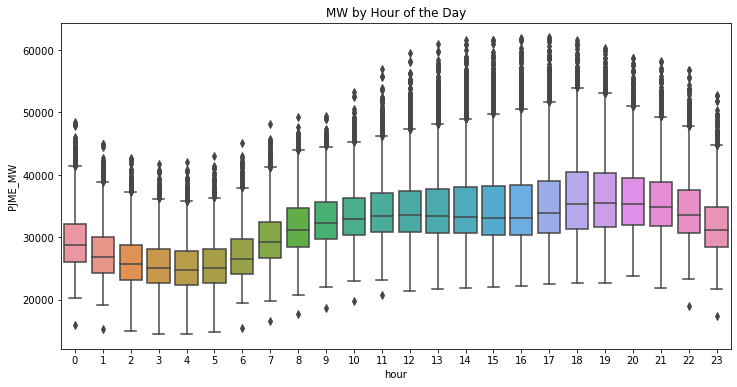

In [33]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'hour', y = 'PJME_MW')
plt.title('MW by Hour of the Day')

Text(0.5, 1.0, 'MW by month')

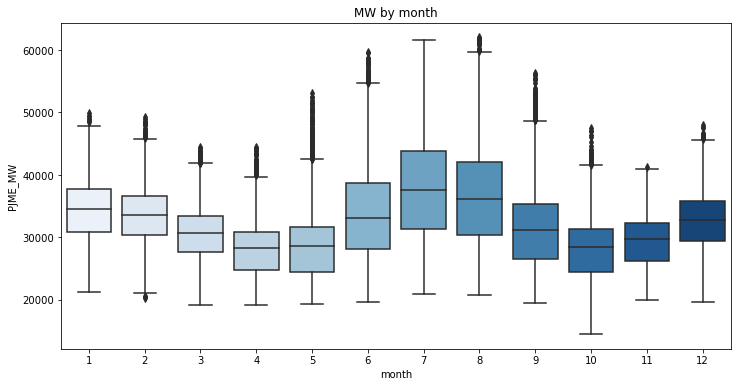

In [35]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'month', y = 'PJME_MW', palette = 'Blues')
plt.title('MW by month')

# Create Model

In [41]:
train = add_time_features(train)
test = add_time_features(test)

In [42]:
df.columns 

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [43]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

In [44]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [48]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, 
                       learning_rate = 0.01, n_jobs = -1)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = True)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.91863
[1]	validation_0-rmse:6363.01592	validation_1-rmse:6438.56942
[2]	validation_0-rmse:6319.31204	validation_1-rmse:6397.94742
[3]	validation_0-rmse:6276.10095	validation_1-rmse:6358.25280
[4]	validation_0-rmse:6233.47267	validation_1-rmse:6319.29254
[5]	validation_0-rmse:6191.44103	validation_1-rmse:6281.12242
[6]	validation_0-rmse:6149.92226	validation_1-rmse:6243.23374
[7]	validation_0-rmse:6109.00344	validation_1-rmse:6206.20061
[8]	validation_0-rmse:6068.55090	validation_1-rmse:6168.85836
[9]	validation_0-rmse:6028.63852	validation_1-rmse:6132.73107
[10]	validation_0-rmse:5989.31481	validation_1-rmse:6097.09606
[11]	validation_0-rmse:5950.47167	validation_1-rmse:6062.05269
[12]	validation_0-rmse:5911.75590	validation_1-rmse:6027.14327
[13]	validation_0-rmse:5873.58600	validation_1-rmse:5993.03326
[14]	validation_0-rmse:5835.89024	validation_1-rmse:5959.14746
[15]	validation_0-rmse:5799.03022	validation_1-rmse:5926.27068
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

# Feature Importance

In [50]:
fi =pd.DataFrame(reg.feature_importances_, 
             index = FEATURES, 
             columns = ['importance'])

<AxesSubplot:title={'center':'feature importance'}>

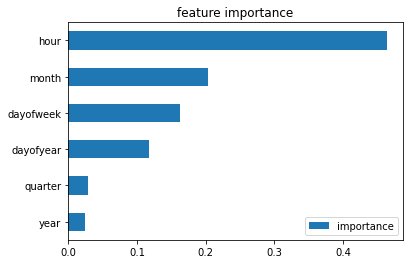

In [53]:
fi.sort_values('importance').plot(kind='barh', title = 'feature importance')

# Forecast on Test

In [54]:
test['prediction'] = reg.predict(X_test)

In [55]:
df = df.merge(test['prediction'], how = 'left', left_index=True, right_index=True)

<AxesSubplot:xlabel='Datetime'>

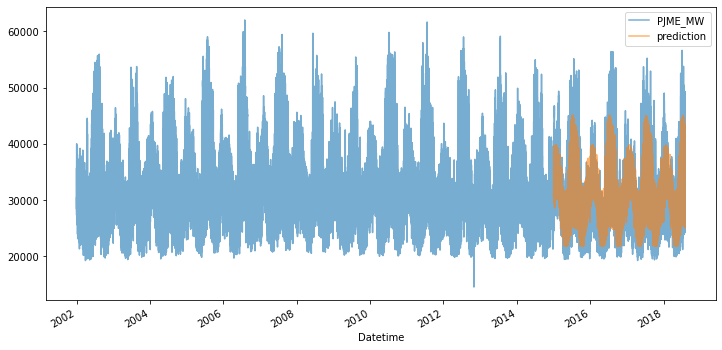

In [57]:
df[['PJME_MW', 'prediction']].plot(figsize = (12,6), alpha = 0.6)

Text(0, 0.5, 'Energy Usage (MW)')

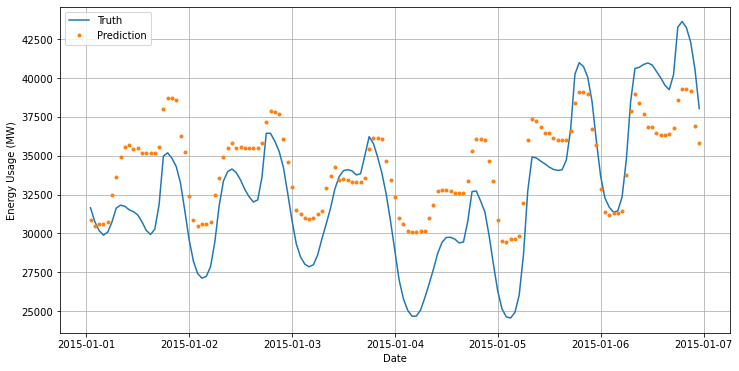

In [64]:
df_week = df.loc[(df.index > '01-01-2015') & (df.index < '01-07-2015')]

plt.figure(figsize = (12,6))
plt.plot(df_week.index.values, df_week['PJME_MW'].values, label = 'Truth')
plt.plot(df_week.index.values, df_week['prediction'].values, '.',label = 'Prediction')
plt.legend()
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('Energy Usage (MW)')

In [67]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE score on Test set: {score:.2f}')

RMSE score on Test set: 3741.09


# Calculate Error
- Look at the worst and best prediced days

In [72]:
test['error'] = np.abs(test[TARGET]-test['prediction'])
test['date'] = test.index.date

In [74]:
test.groupby('date').mean()['error'].sort_values(ascending = False).head(5)

date
2016-08-13    13829.866211
2016-08-14    13577.304362
2016-09-10    11235.855143
2016-09-09    11032.220215
2016-08-12    10667.820312
Name: error, dtype: float64

In [75]:
test.groupby('date').mean()['error'].sort_values(ascending = True).head(5)

date
2016-12-30    395.436442
2017-10-24    413.885824
2016-10-27    440.053141
2016-04-04    440.223877
2017-05-02    453.738688
Name: error, dtype: float64

# Next Steps
- More robust cross validation
- Add more features (e.g., Weather)